In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import seaborn as sns
import numpy as np
sns.set()
sns.set_palette(sns.color_palette("viridis"))
sns.set_theme(style="white")
sns.set_style("whitegrid")
sns.set(font_scale=3)
sns.set(rc={'figure.figsize':(10, 10)})

In [2]:
simulation_a = pd.read_csv("../TP5/data/simulation_a.csv")
simulation_b = pd.read_csv("../TP5/data/simulation_b.csv")

In [3]:
simulation_a.head(), simulation_b.head()

(   exit_n   time  run
 0       0  1.675    0
 1       1  2.625    0
 2       2  3.025    0
 3       3  3.275    0
 4       4  3.675    0,
      N    d  run  exit_n   time
 0  200  1.2    0       0  1.475
 1  200  1.2    0       1  2.150
 2  200  1.2    0       2  2.575
 3  200  1.2    0       3  3.350
 4  200  1.2    0       4  3.575)

In [4]:
simulation_a.shape, simulation_b.shape

((2000, 3), (3480, 5))

In [5]:
simulation_a['exit_n'] = simulation_a['exit_n'] + 1
simulation_a.head()

,exit_n,time,run
0,1,1.675,0
1,2,2.625,0
2,3,3.025,0
3,4,3.275,0
4,5,3.675,0


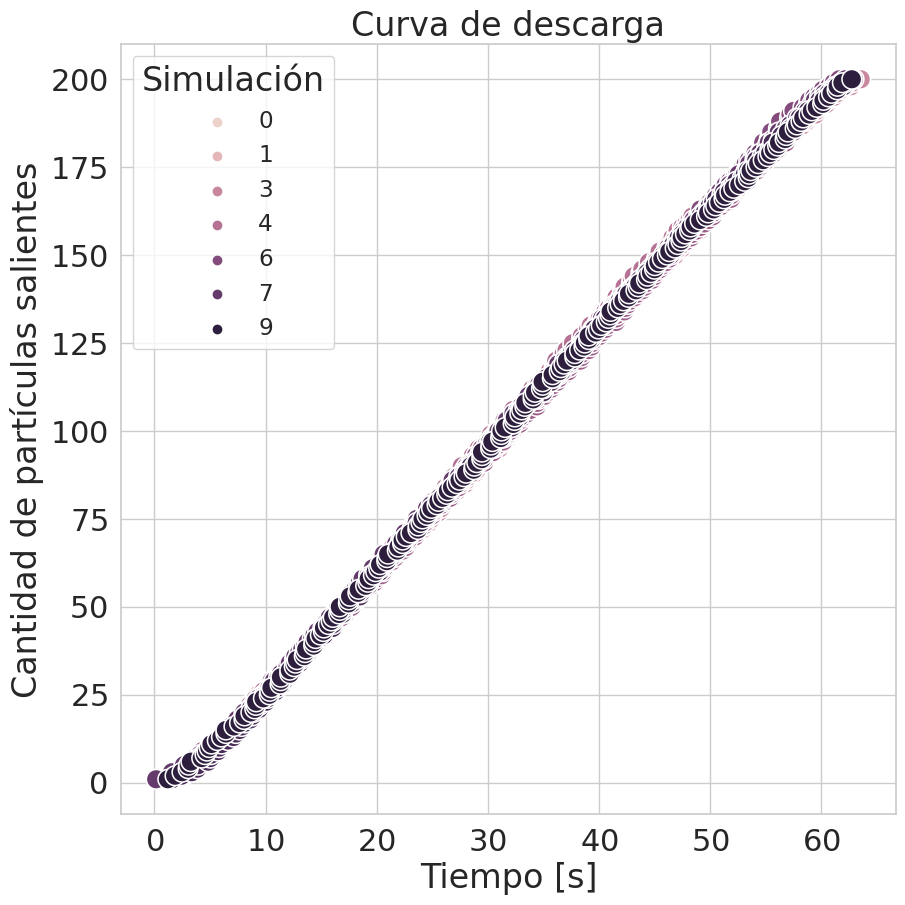

In [6]:
sns.set_palette(sns.color_palette("viridis"))
# Establecer el estilo y tamaño de fuente
sns.set(style="whitegrid", font_scale=2)

# Crear el gráfico de línea acumulativo con Seaborn
ax = sns.scatterplot(data=simulation_a, x='time', y='exit_n', hue='run', marker='o', s=200, alpha=1)

# Formato de notación científica para el eje y
ax.ticklabel_format(style='sci', useMathText=True)

# Personalizar el gráfico
plt.xlabel('Tiempo [s]')
plt.ylabel('Cantidad de partículas salientes')
plt.title('Curva de descarga')
plt.legend(title='Simulación', fontsize='x-small')

# plt.xlim(2, 10)  # Ajusta los límites según lo necesario

# Mostrar el gráfico
plt.show()


In [7]:
# Promediar los valores de time por exit_n
mean_simulation_a = simulation_a.groupby('exit_n')['time'].mean().reset_index()

# Agregar las columnas de min_time y max_time
mean_simulation_a['min_time'] = simulation_a.groupby('exit_n')['time'].min().values
mean_simulation_a['max_time'] = simulation_a.groupby('exit_n')['time'].max().values

mean_simulation_a

,exit_n,time,min_time,max_time
0,1,1.0600,0.150,1.675
1,2,1.7850,1.300,2.625
2,3,2.3900,1.575,3.350
3,4,2.8250,2.325,3.850
4,5,3.2675,2.650,3.925
...,...,...,...,...
195,196,60.8100,59.825,61.425
196,197,61.2925,60.150,61.750
197,198,61.8050,60.725,62.650
198,199,62.1750,61.125,62.775


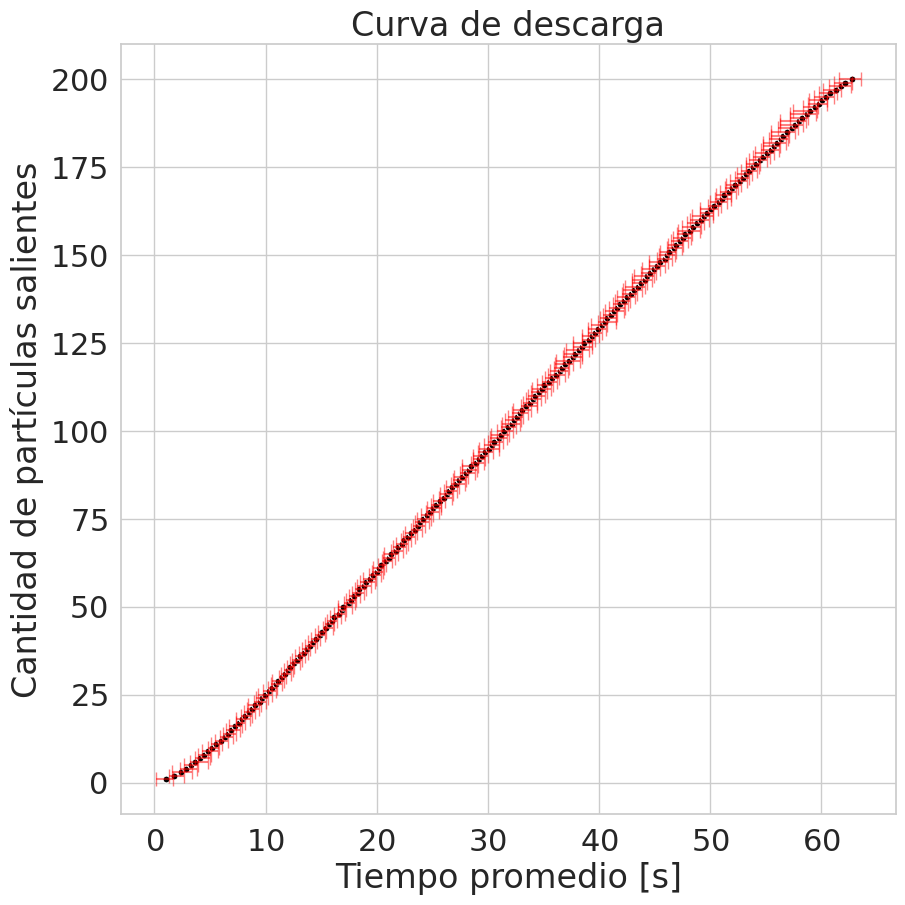

In [8]:
# Establecer el estilo y tamaño de fuente
sns.set(style="whitegrid", font_scale=2)

sns.set_palette(sns.color_palette("viridis"))

# Crear el scatterplot con barras de error
plt.errorbar(mean_simulation_a['time'], mean_simulation_a['exit_n'], xerr=[mean_simulation_a['time'] - mean_simulation_a['min_time'], mean_simulation_a['max_time'] - mean_simulation_a['time']], fmt='none', capsize=5, color='red', alpha=0.5)
ax = sns.scatterplot(data=mean_simulation_a, y='exit_n', x='time', marker='.', s=100, alpha=1, color='black')


# Formato de notación científica para el eje y
ax.ticklabel_format(style='sci', useMathText=True)

# Etiquetas y título del gráfico
plt.ylabel('Cantidad de partículas salientes')
plt.xlabel('Tiempo promedio [s]')
plt.title('Curva de descarga')

# Mostrar el gráfico
plt.show()


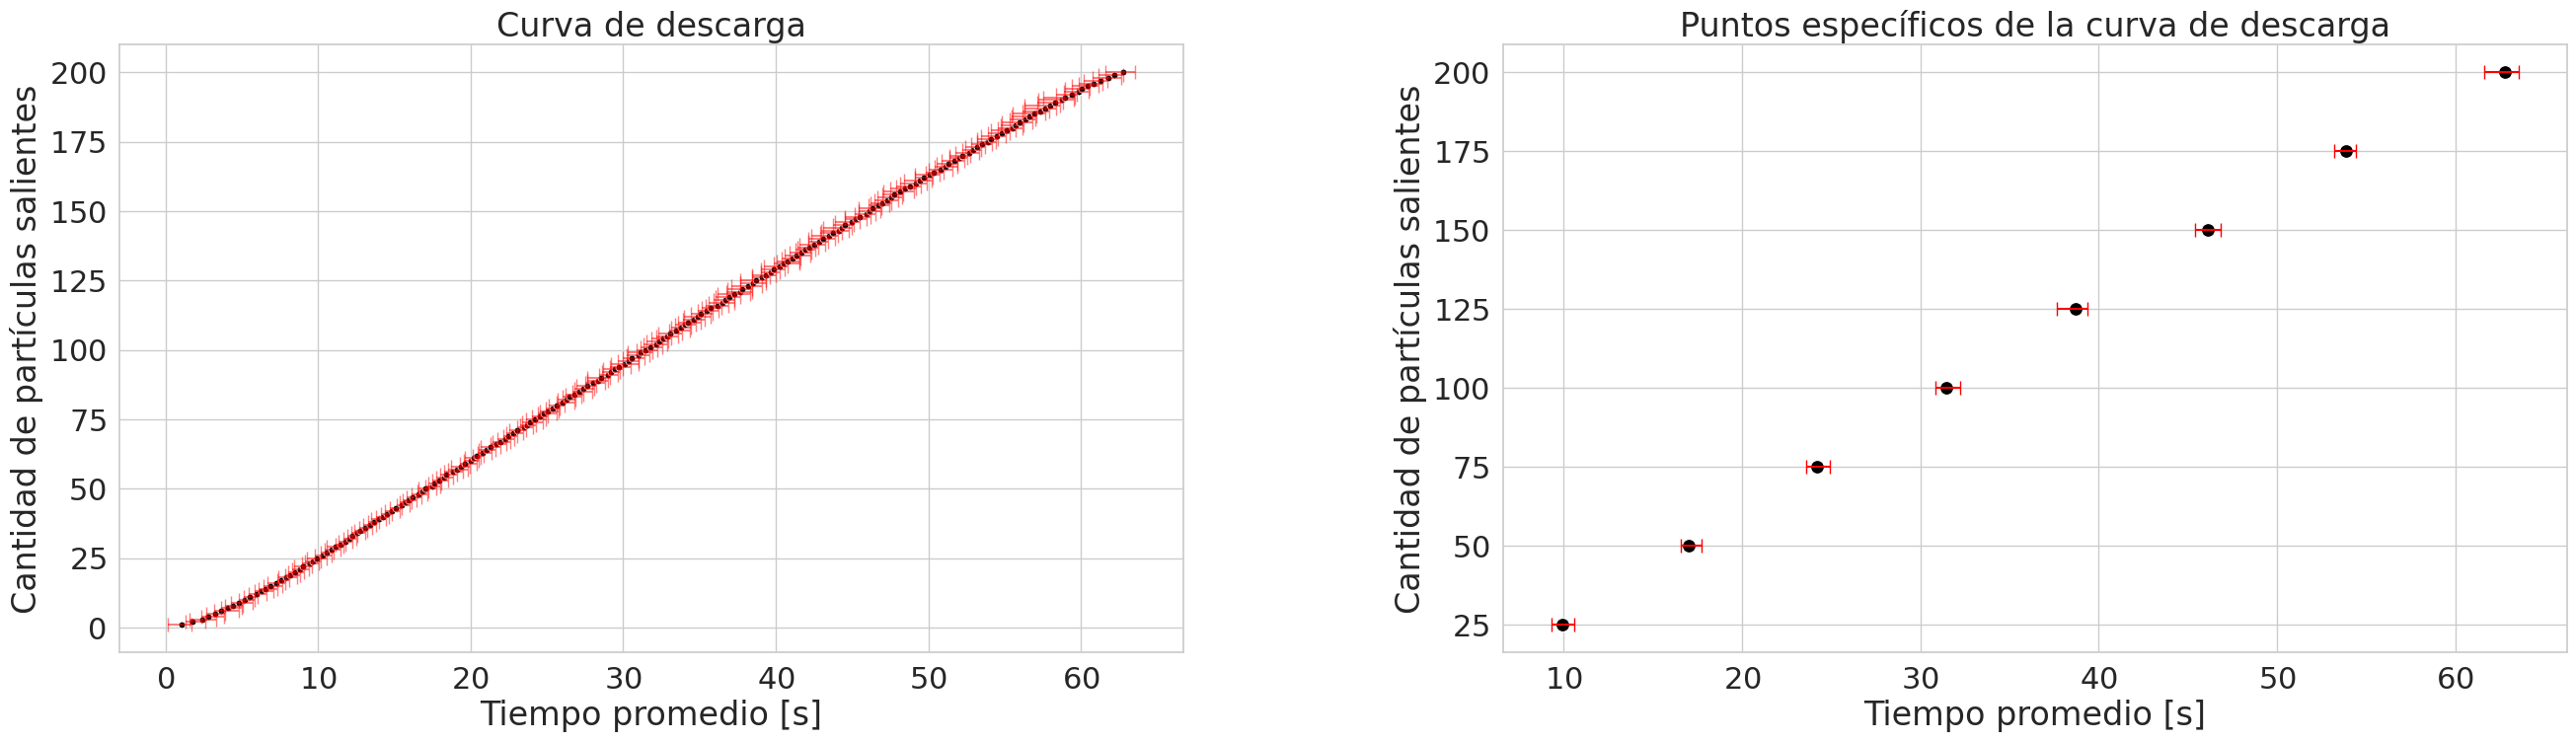

In [9]:
from matplotlib.gridspec import GridSpec

# Establecer el estilo y tamaño de fuente
sns.set(style="whitegrid", font_scale=2)
sns.set_palette(sns.color_palette("viridis"))

# Crear la figura y la especificación de la cuadrícula
fig = plt.figure(figsize=(32, 8))
grid = GridSpec(1, 2, width_ratios=[3, 3])

# Gráfico existente
ax1 = fig.add_subplot(grid[0])
plt.errorbar(mean_simulation_a['time'], mean_simulation_a['exit_n'], xerr=[mean_simulation_a['time'] - mean_simulation_a['min_time'], mean_simulation_a['max_time'] - mean_simulation_a['time']], fmt='none', capsize=5, color='red', alpha=0.5)
sns.scatterplot(data=mean_simulation_a, y='exit_n', x='time', marker='.', s=100, alpha=1, color='black')
ax1.ticklabel_format(style='sci', useMathText=True)
plt.ylabel('Cantidad de partículas salientes')
plt.xlabel('Tiempo promedio [s]')
plt.title('Curva de descarga')

# Nuevo gráfico al lado
ax2 = fig.add_subplot(grid[1])
exit_n_values = [25, 50, 75, 100, 125, 150, 175, 200]
filtered_data = mean_simulation_a[mean_simulation_a['exit_n'].isin(exit_n_values)]
sns.scatterplot(data=filtered_data, y='exit_n', x='time', marker='o', s=100, alpha=1, color='black')
plt.errorbar(filtered_data['time'], filtered_data['exit_n'], xerr=[filtered_data['time'] - filtered_data['min_time'], filtered_data['max_time'] - filtered_data['time']], fmt='none', capsize=5, color='red', alpha=1)
ax2.ticklabel_format(style='sci', useMathText=True)
plt.ylabel('Cantidad de partículas salientes')
plt.xlabel('Tiempo promedio [s]')
plt.title('Puntos específicos de la curva de descarga')

# Ajustar la disposición de los subgráficos
grid.update(wspace=0.3)
# plt.tight_layout(hspace=0.5)

# Mostrar el gráfico
plt.show()


In [10]:
# Calcular el delta de la cantidad de partículas salientes y el delta de tiempo (dt)
mean_simulation_a['delta_exit_n'] = mean_simulation_a['exit_n'].diff()
mean_simulation_a['dt'] = mean_simulation_a['time'].diff()

# Calcular el caudal (Q)
mean_simulation_a['Q'] = mean_simulation_a['delta_exit_n'] / mean_simulation_a['dt']

# Reiniciar el índice del DataFrame
mean_simulation_a.reset_index(drop=True, inplace=True)

# Agrupar por rango de partículas salientes y calcular el promedio del caudal (Q)
grouped_mean_simulation_a = mean_simulation_a.groupby('exit_n')['Q'].mean()

# Encontrar el rango en el que el caudal (Q) es constante
const_q_ranges = []
current_range = [grouped_mean_simulation_a.index[0], grouped_mean_simulation_a.index[0]]
for i in range(1, len(grouped_mean_simulation_a)):
    if abs(grouped_mean_simulation_a.iloc[i] - grouped_mean_simulation_a.iloc[i-1]) < 0.000000001:  # Tolerancia para considerar el caudal constante
        current_range[1] = grouped_mean_simulation_a.index[i]
    else:
        const_q_ranges.append(current_range.copy())
        current_range = [grouped_mean_simulation_a.index[i], grouped_mean_simulation_a.index[i]]

# Imprimir los rangos en los que el caudal (Q) es constante
for range_start, range_end in const_q_ranges:
    print(f"Caudal constante en el rango de partículas salientes [{range_start}, {range_end}]")


Caudal constante en el rango de partículas salientes [1, 1]
Caudal constante en el rango de partículas salientes [2, 2]
Caudal constante en el rango de partículas salientes [3, 3]
Caudal constante en el rango de partículas salientes [4, 4]
Caudal constante en el rango de partículas salientes [5, 5]
Caudal constante en el rango de partículas salientes [6, 6]
Caudal constante en el rango de partículas salientes [7, 7]
Caudal constante en el rango de partículas salientes [8, 8]
Caudal constante en el rango de partículas salientes [9, 9]
Caudal constante en el rango de partículas salientes [10, 10]
Caudal constante en el rango de partículas salientes [11, 11]
Caudal constante en el rango de partículas salientes [12, 12]
Caudal constante en el rango de partículas salientes [13, 13]
Caudal constante en el rango de partículas salientes [14, 14]
Caudal constante en el rango de partículas salientes [15, 15]
Caudal constante en el rango de partículas salientes [16, 16]
Caudal constante en el ran

In [11]:
simulation_b.head(), simulation_b.shape

(     N    d  run  exit_n   time
 0  200  1.2    0       0  1.475
 1  200  1.2    0       1  2.150
 2  200  1.2    0       2  2.575
 3  200  1.2    0       3  3.350
 4  200  1.2    0       4  3.575,
 (3480, 5))

In [12]:
simulation_b["exit_n"] = simulation_b["exit_n"] + 1 
simulation_b

,N,d,run,exit_n,time
0,200,1.2,0,1,1.475
1,200,1.2,0,2,2.150
2,200,1.2,0,3,2.575
3,200,1.2,0,4,3.350
4,200,1.2,0,5,3.575
...,...,...,...,...,...
3475,380,3.0,2,376,50.725
3476,380,3.0,2,377,51.200
3477,380,3.0,2,378,51.325
3478,380,3.0,2,379,51.525


In [13]:
# Promediar los valores de time por exit_n
mean_simulation_b = simulation_b.groupby(['N', 'd', 'exit_n'])['time'].mean().reset_index()

# Agregar las columnas de min_time y max_time
mean_simulation_b['min_time'] = simulation_b.groupby(['N', 'd', 'exit_n'])['time'].min().values
mean_simulation_b['max_time'] = simulation_b.groupby(['N', 'd', 'exit_n'])['time'].max().values

mean_simulation_b

,N,d,exit_n,time,min_time,max_time
0,200,1.2,1,0.908333,0.250,1.475
1,200,1.2,2,1.750000,1.550,2.150
2,200,1.2,3,2.375000,2.150,2.575
3,200,1.2,4,2.966667,2.650,3.350
4,200,1.2,5,3.291667,3.150,3.575
...,...,...,...,...,...,...
1155,380,3.0,376,51.366667,50.725,52.000
1156,380,3.0,377,51.850000,51.200,52.525
1157,380,3.0,378,52.191667,51.325,53.050
1158,380,3.0,379,52.691667,51.525,53.425


In [18]:
# Calcular el delta de la cantidad de partículas salientes y el delta de tiempo (dt)
mean_simulation_b.at[1090, 'time'] = 42.200
mean_simulation_b['delta_exit_n'] = mean_simulation_b['exit_n'].diff()
mean_simulation_b['dt'] = mean_simulation_b['time'].diff().replace(0, 0.0001)

# Calcular el caudal (Q)
mean_simulation_b['Q'] = mean_simulation_b['delta_exit_n'] / mean_simulation_b['dt']
mean_simulation_b['Q_variation'] = mean_simulation_b['Q'].pct_change()
mean_simulation_b

,N,d,exit_n,time,min_time,max_time,delta_exit_n,dt,Q,Q_variation,is_stationary
0,200,1.2,1,0.908333,0.250,1.475,NaN,NaN,NaN,NaN,True
1,200,1.2,2,1.750000,1.550,2.150,1.0,0.841667,1.188119,NaN,True
2,200,1.2,3,2.375000,2.150,2.575,1.0,0.625000,1.600000,3.466667e-01,True
3,200,1.2,4,2.966667,2.650,3.350,1.0,0.591667,1.690141,5.633803e-02,True
4,200,1.2,5,3.291667,3.150,3.575,1.0,0.325000,3.076923,8.205128e-01,True
5,200,1.2,6,3.675000,3.375,4.175,1.0,0.383333,2.608696,-1.521739e-01,True
6,200,1.2,7,4.258333,3.775,4.825,1.0,0.583333,1.714286,-3.428571e-01,True
7,200,1.2,8,4.475000,4.125,4.875,1.0,0.216667,4.615385,1.692308e+00,True
8,200,1.2,9,4.850000,4.350,5.350,1.0,0.375000,2.666667,-4.222222e-01,True
9,200,1.2,10,4.941667,4.550,5.375,1.0,0.091667,10.909091,3.090909e+00,True


In [19]:
# Encontrar los rangos de tiempos donde el caudal se mantiene constante
constant_Q_ranges = []
current_range_start = None

for index, row in mean_simulation_b.iterrows():
    if current_range_start is None:
        current_range_start = row['time']
    elif abs(row['Q_variation']) < 1e-3:  # Variación relativa mínima para considerar constante
        if current_range_start != row['time']:
            constant_Q_ranges.append((current_range_start, row['time']))
        current_range_start = None

# Crear la columna "is_stationary" e inicializarla como False
mean_simulation_b['is_stationary'] = False
        
# Imprimir los rangos de tiempos donde el caudal se mantiene constante
# Marcar las filas correspondientes a los rangos de tiempo donde el caudal es constante
for start, end in constant_Q_ranges:
    print(f"Caudal constante en el rango de tiempo [{start:.4f}, {end:.4f}]")
    mean_simulation_b.loc[(mean_simulation_b['time'] >= start) & (mean_simulation_b['time'] <= end), 'is_stationary'] = True

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
    
mean_simulation_b

Caudal constante en el rango de tiempo [0.9083, 6.4917]
Caudal constante en el rango de tiempo [7.0750, 20.1667]
Caudal constante en el rango de tiempo [20.5417, 43.2333]
Caudal constante en el rango de tiempo [43.5250, 58.0333]
Caudal constante en el rango de tiempo [58.4250, 11.0833]
Caudal constante en el rango de tiempo [11.3167, 13.9917]
Caudal constante en el rango de tiempo [14.0667, 14.1417]
Caudal constante en el rango de tiempo [14.4000, 25.5167]
Caudal constante en el rango de tiempo [25.7000, 38.0333]
Caudal constante en el rango de tiempo [38.3500, 38.9000]
Caudal constante en el rango de tiempo [39.0583, 42.3750]
Caudal constante en el rango de tiempo [42.5750, 45.9500]
Caudal constante en el rango de tiempo [46.3500, 49.0917]
Caudal constante en el rango de tiempo [49.2917, 4.5000]
Caudal constante en el rango de tiempo [4.7000, 10.7083]
Caudal constante en el rango de tiempo [10.8417, 14.5000]
Caudal constante en el rango de tiempo [14.5583, 19.3917]
Caudal constante en

,N,d,exit_n,time,min_time,max_time,delta_exit_n,dt,Q,Q_variation,is_stationary
0,200,1.2,1,0.908333,0.250,1.475,NaN,NaN,NaN,NaN,True
1,200,1.2,2,1.750000,1.550,2.150,1.0,0.841667,1.188119,NaN,True
2,200,1.2,3,2.375000,2.150,2.575,1.0,0.625000,1.600000,3.466667e-01,True
3,200,1.2,4,2.966667,2.650,3.350,1.0,0.591667,1.690141,5.633803e-02,True
4,200,1.2,5,3.291667,3.150,3.575,1.0,0.325000,3.076923,8.205128e-01,True
5,200,1.2,6,3.675000,3.375,4.175,1.0,0.383333,2.608696,-1.521739e-01,True
6,200,1.2,7,4.258333,3.775,4.825,1.0,0.583333,1.714286,-3.428571e-01,True
7,200,1.2,8,4.475000,4.125,4.875,1.0,0.216667,4.615385,1.692308e+00,True
8,200,1.2,9,4.850000,4.350,5.350,1.0,0.375000,2.666667,-4.222222e-01,True
9,200,1.2,10,4.941667,4.550,5.375,1.0,0.091667,10.909091,3.090909e+00,True


In [20]:
q_sum_d_3 = mean_simulation_b[mean_simulation_b['d'] == 3.0]['Q'].sum()
print("Suma de la columna Q para d=3.0:", q_sum_d_3)

Suma de la columna Q para d=3.0: 3895.819901852241


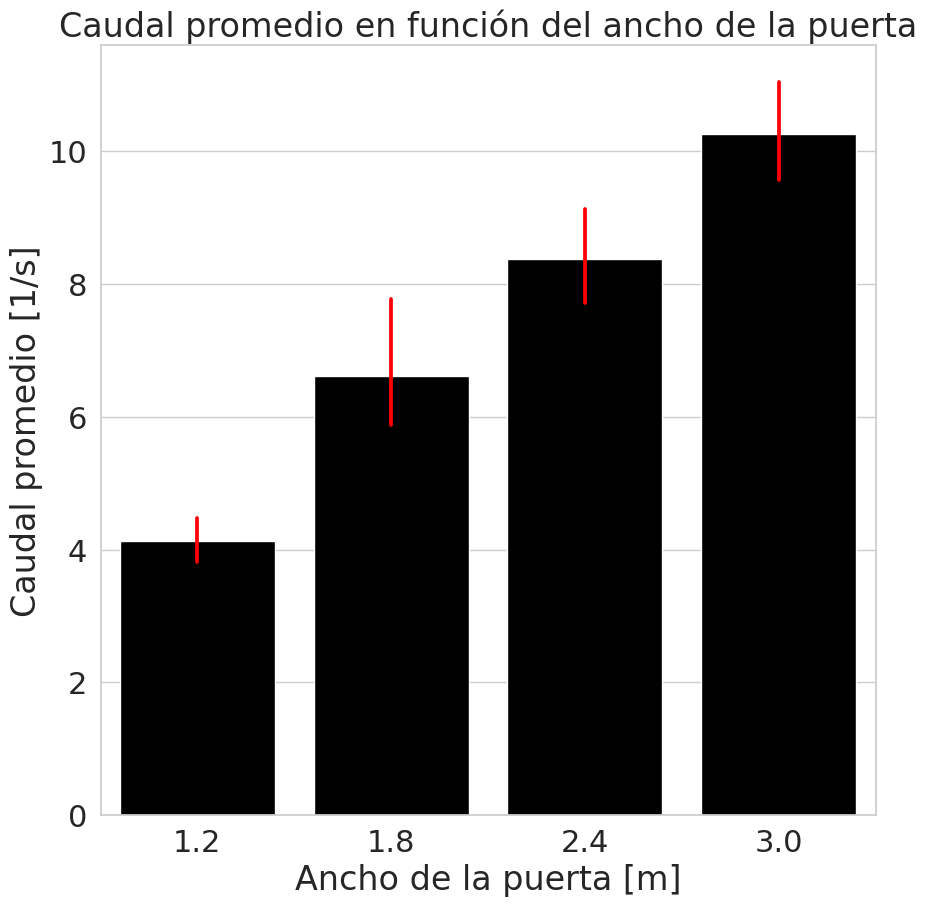

In [33]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='d', y='Q', data=mean_simulation_b, color='black', errcolor='red')

# Configurar las etiquetas del gráfico
plt.xlabel('Ancho de la puerta [m]')
plt.ylabel('Caudal promedio [1/s]')
plt.title('Caudal promedio en función del ancho de la puerta')

# Mostrar el gráfico
plt.show()

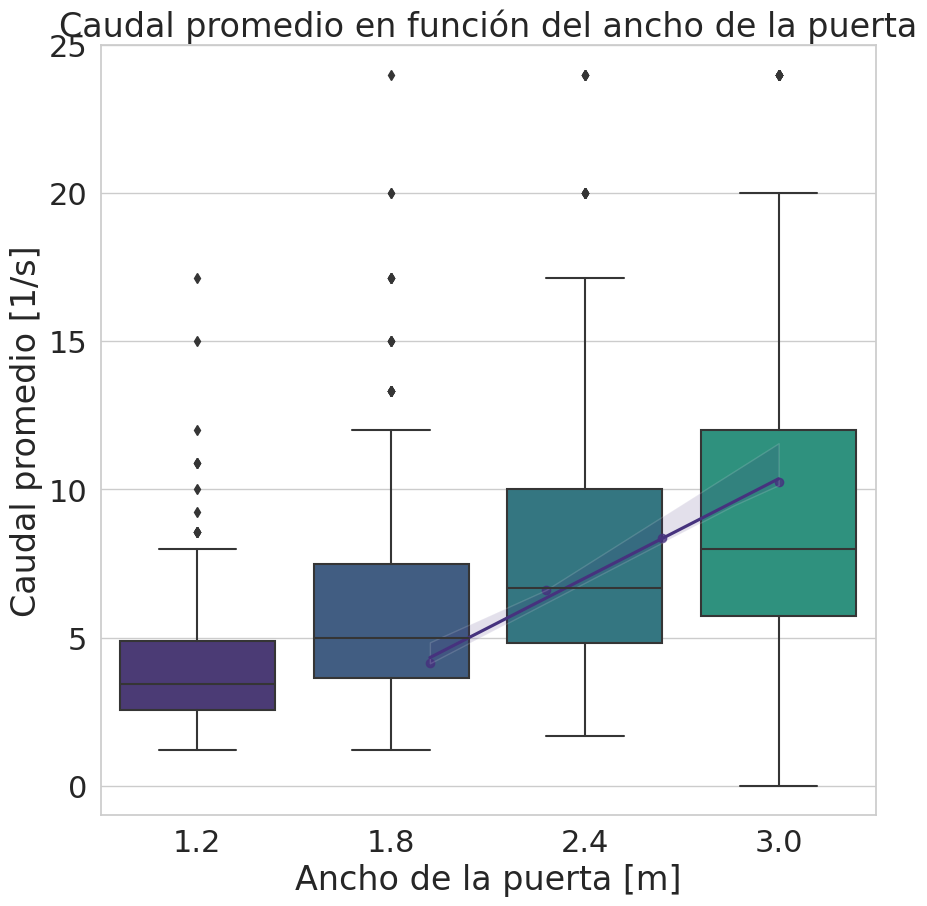

In [54]:
# Ajustar los datos para que el caudal sea siempre positivo
adjusted_data = np.maximum(mean_simulation_b['Q'], 0)

# Crear el boxplot utilizando Seaborn
sns.boxplot(x='d', y=adjusted_data, data=mean_simulation_b)

# Agregar la regresión lineal a los valores medios
sns.regplot(x='d', y='Q', data=mean_simulation_b.groupby('d')['Q'].mean().reset_index(), scatter=True)

# Configurar las etiquetas del gráfico
plt.xlabel('Ancho de la puerta [m]')
plt.ylabel('Caudal promedio [1/s]')
plt.title('Caudal promedio en función del ancho de la puerta')

plt.ylim(-1, 25)

# Mostrar el gráfico
plt.show()


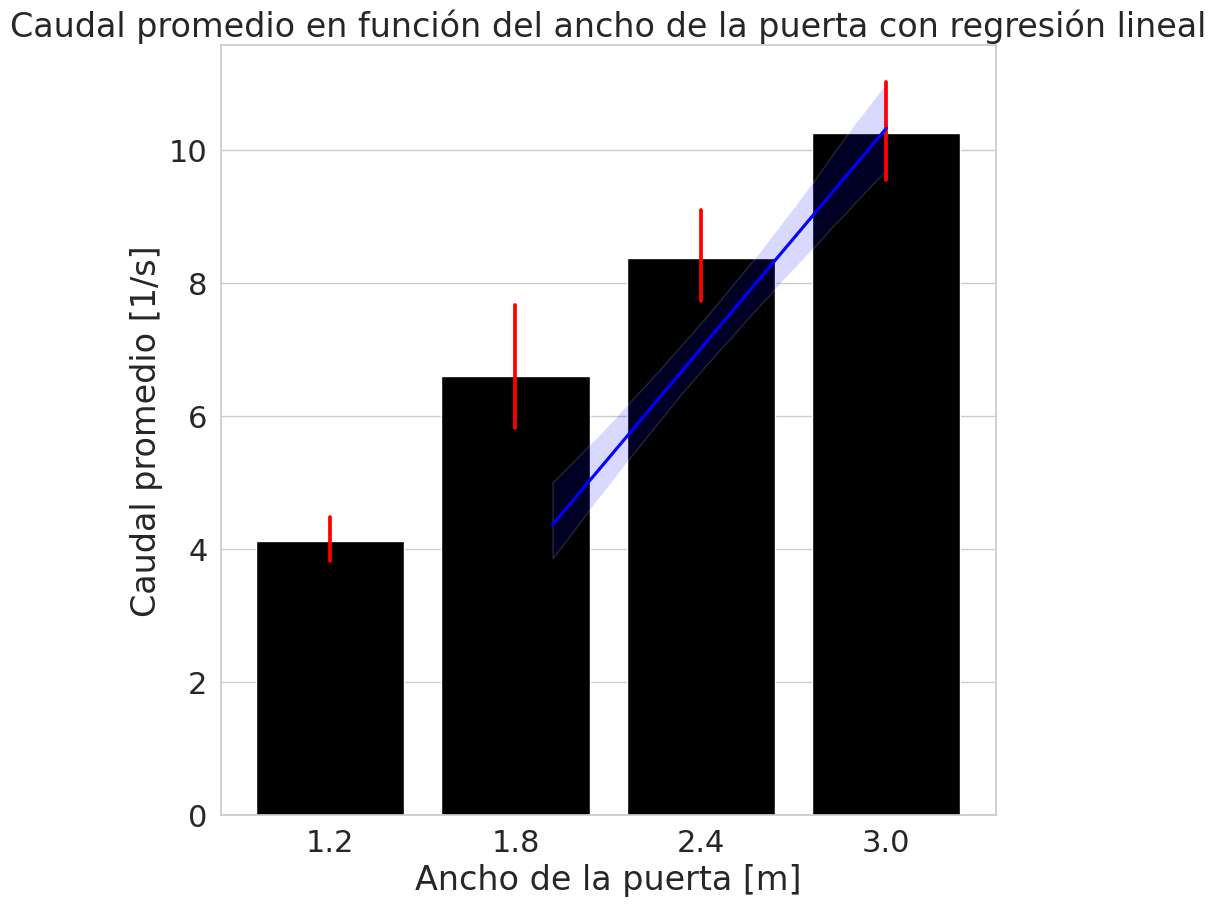

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='d', y='Q', data=mean_simulation_b, color='black', errcolor='red')

# Calcular los coeficientes de regresión para cada categoría y trazar las líneas de regresión
sns.regplot(x='d', y='Q', data=mean_simulation_b, scatter=False, color='blue')

# Configurar las etiquetas del gráfico
plt.xlabel('Ancho de la puerta [m]')
plt.ylabel('Caudal promedio [1/s]')
plt.title('Caudal promedio en función del ancho de la puerta con regresión lineal')

# Mostrar el gráfico

plt.show()